# Predicting the cost of media campaigns in the food marts on the basis of the features provided.


## 1. Problem Definition

Food Mart (CFM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and currently, approximately 325 stores are located in the US. Convenient Food Mart operates on the franchise system.
Food Mart was the nation's third-largest chain of convenience stores as of 1988.
The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements.
Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s.

**Task is to devise a Machine Learning Model that helps us predict the cost of media campaigns in the food marts on the basis of the features provided.**

## 2. Data

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Media Campaign Cost Prediction dataset

Data is from kaggle https://www.kaggle.com/datasets/gauravduttakiit/media-campaign-cost-prediction


**Train.csv** - This is to be used for training the data `(cost is the target)`

**Test.csv** - This is to be used for testing purposes `(your objective is to predict cost)`

## 3. Evaluation

**Root Mean Squared Log Error (RMLSE)**
Submissions are scored on the root mean squared log error (RMSLE) (the sklearn mean_squared_log_error with squared=False).

**Note:** The goal for an regression proble is to minimize the error, for this case is build a machine models that minimizes the RSMLE

## 4. Features

**Various Columns/Features**

1. store_sales(in millions) - store_sales(in million dollars)
2. unit_sales(in millions) - unit_sales(in millions) in stores Quantity
3. Total_children - TOTAL CHILDREN IN HOME
4. avg_cars_at home(approx) - avg_cars_at home(approx)
5. Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
6. Gross_weight - gross_weight OF ITEM
7. Recyclable_package - FOOD ITEM IS recyclable_package
8. Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
9. Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
11. Store_sqft - STORE AREA AVAILABLE IN SQFT
12. Coffee_bar - COFFEE BAR available in store
13. Video_store - VIDEO STORE/gaming store available
14. Salad_bar - SALAD BAR available in store
15. Prepared_food - food prepared available in store
16. Florist - flower shelves available in store
17. Cost - COST ON ACQUIRING A CUSTOMERS in dollars


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\KEVIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
df.shape

(360336, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [5]:
df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [6]:
df.isna().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

## EDA (Exploring the data further)

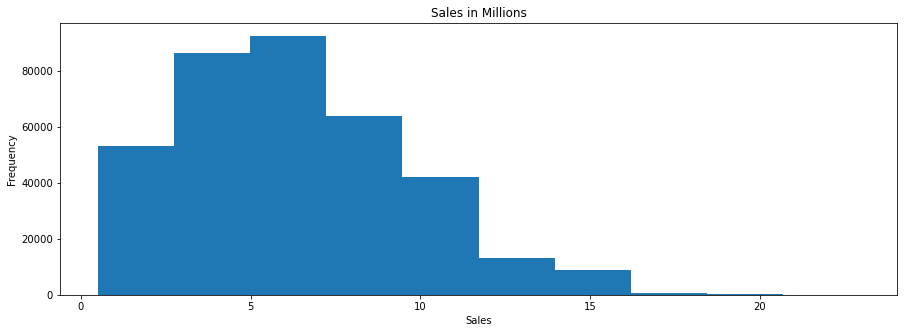

In [7]:
# Cost distribution, Create a copy of the data base to ease the process of tracing back the original data

plt.figure(figsize=(15, 5))
df_temp = df.copy()
df_temp["store_sales(in millions)"].plot(kind='hist')
plt.title ("Sales in Millions")
plt.xlabel("Sales");


In [8]:
df_temp.corr()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
id,1.000000,0.001750,0.000586,0.003260,0.001695,0.003257,0.001178,0.000276,0.000735,0.000496,0.000071,-0.001613,-0.002796,-0.002218,-0.002217,-0.003533,-0.000611
store_sales(in millions),0.001750,1.000000,0.481376,0.069303,0.029261,0.006794,0.038159,0.030390,-0.008735,-0.009893,0.021572,-0.040039,0.029564,0.044832,0.044854,0.046472,-0.012387
unit_sales(in millions),0.000586,0.481376,1.000000,0.113231,0.046755,0.017119,0.000467,0.001074,-0.003663,0.001141,0.045540,-0.076967,0.053795,0.082445,0.082485,0.083062,-0.026509
total_children,0.003260,0.069303,0.113231,1.000000,0.359207,0.078519,-0.000908,0.002236,-0.001597,-0.000267,-0.008991,-0.006476,-0.013303,-0.023564,-0.023560,-0.012545,-0.007482
num_children_at_home,0.001695,0.029261,0.046755,0.359207,1.000000,0.115476,-0.000601,0.006104,-0.000208,-0.004174,0.005785,-0.023234,-0.020738,-0.031109,-0.031050,-0.017888,-0.001727
avg_cars_at home(approx).1,0.003257,0.006794,0.017119,0.078519,0.115476,1.000000,-0.002267,0.004021,-0.001912,0.001190,-0.020032,-0.000441,0.012702,-0.013102,-0.013035,-0.004284,0.027098
gross_weight,0.001178,0.038159,0.000467,-0.000908,-0.000601,-0.002267,1.000000,0.059050,-0.033421,-0.017609,-0.000455,0.000835,-0.000845,0.002116,0.002155,0.000764,-0.000116
recyclable_package,0.000276,0.030390,0.001074,0.002236,0.006104,0.004021,0.059050,1.000000,-0.030025,-0.003028,-0.000343,0.004037,0.004129,0.004674,0.004672,0.004849,-0.001455
low_fat,0.000735,-0.008735,-0.003663,-0.001597,-0.000208,-0.001912,-0.033421,-0.030025,1.000000,0.030226,0.001972,0.002622,0.002893,0.005602,0.005567,0.005540,-0.001975
units_per_case,0.000496,-0.009893,0.001141,-0.000267,-0.004174,0.001190,-0.017609,-0.003028,0.030226,1.000000,0.002297,0.000828,0.000569,0.001698,0.001699,0.000556,0.000180


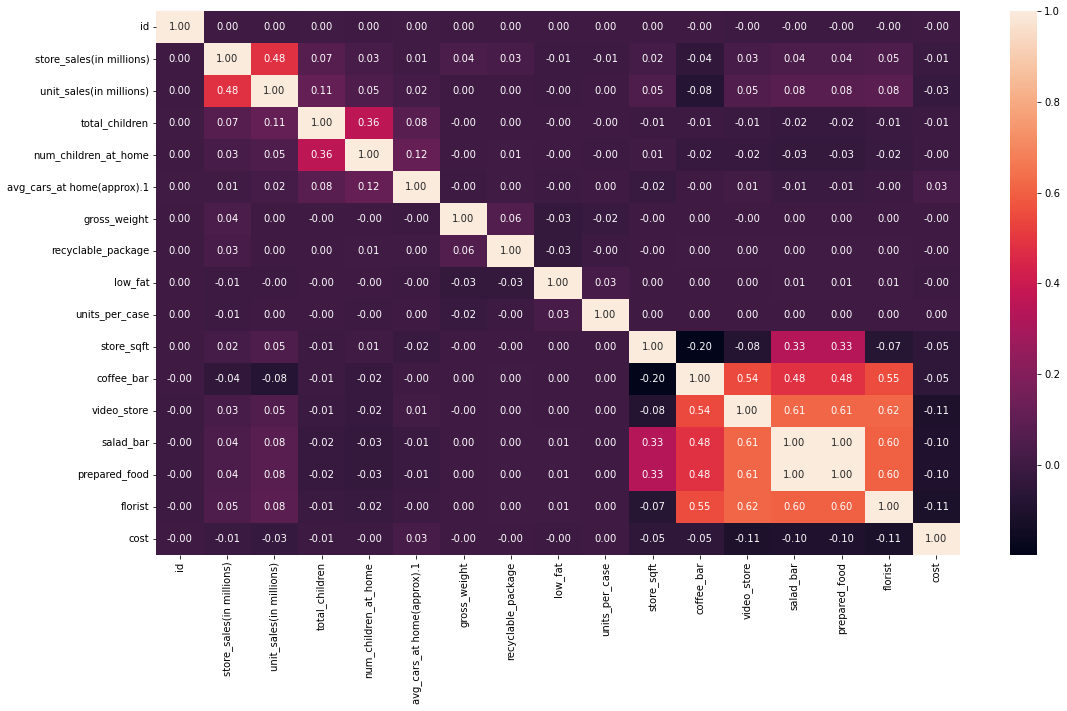

In [9]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_temp.corr(),
           annot=True,
           fmt=".2f");

##### The relation between cost and other features are negatively correlated suggesting the features are impacting on the cost spent on advertising

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, Lasso

#evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error


In [12]:
# Splitting the train dataset into train and test set
X = df_temp.drop("cost", axis = 1)
y = df_temp["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape

(288268, 16)

In [14]:
## Selecting the machine learning model
models = {"Random Forest": RandomForestRegressor(),
         "Linear Regression": LinearRegression(),
         "Ridge": RidgeCV(),
         "Lasso": Lasso()}

In [26]:
def fit_and_score(model, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [27]:
# Select a model that perform best and in this case randomforestRegressor has done better
fit_and_score(models, X_train, X_test, y_train, y_test)

{'Random Forest': 0.08261337987226125,
 'Linear Regression': 0.018850981557845703,
 'Ridge': 0.018911840136725755,
 'Lasso': 0.011962152722135189}

In [28]:
model_ = RandomForestRegressor(max_samples=10000)

In [32]:
# Created a function to calculae the RMSLE though the below could be used.

# squaredbool, default=True
# If True returns MSLE (mean squared log error) value. If False returns RMSLE (root mean squared log error) value.

def rsmle(y_test, y_preds):
    
    """
    getting the square root of mean squared log error
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds, ))

In [33]:


def _scores(model):
    y_preds = model_.predict(X_test)
    
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
             "MSE": mean_squared_error(y_test, y_preds),
             "RSMLE": rsmle(y_test, y_preds)}
    return scores
    

### Leader Board private scores
<img src="leaderboard.PNG"/>

In [36]:
## Scores based on RSMLE
_scores(model_)

{'MAE': 24.750815177332516,
 'MSE': 828.2458620070734,
 'RSMLE': 0.308056709676096}

In [37]:
## Tuning the model to improve its performance

model_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10],
          "min_samples_leaf": np.arange(1, 20, 3),
          "max_features": [0.5, 'sqrt', 'auto'],
          "max_samples": [10000]}

In [39]:
from sklearn.model_selection import RandomizedSearchCV


In [48]:
rf_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42), 
                             param_distributions=rf_grid,
                            n_iter = 20,
                             cv = 5,
                             verbose=True)

In [49]:
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 'sqrt', 'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  4,  7, 10, 13, 16, 19]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [50]:
rf_model.best_params_

{'n_estimators': 70,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [51]:
_scores(rf_model)

{'MAE': 24.750815177332516,
 'MSE': 828.2458620070734,
 'RSMLE': 0.308056709676096}

In [52]:
ideal_model = RandomForestRegressor(n_estimators=70,
                                   min_samples_leaf=13,
                                   max_samples=None,
                                   max_features='auto',
                                   max_depth=None,
                                   random_state=42)

In [53]:
ideal_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=13, n_estimators=70, random_state=42)

In [54]:
_scores(ideal_model)

{'MAE': 24.750815177332516,
 'MSE': 828.2458620070734,
 'RSMLE': 0.308056709676096}

### Predicting with the test data set

In [55]:
# Import the test data set
test_set = pd.read_csv("test.csv")
test_set.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0
2,360338,8.34,3.0,0.0,0.0,3.0,8.77,0.0,1.0,14.0,39696.0,0.0,0.0,1.0,1.0,0.0
3,360339,5.48,2.0,3.0,3.0,2.0,21.90,1.0,0.0,9.0,23688.0,1.0,1.0,1.0,1.0,1.0
4,360340,4.80,3.0,2.0,0.0,2.0,10.90,1.0,0.0,11.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [56]:
predicted_cost = ideal_model.predict(test_set)

In [58]:
predicted_cost

array([ 95.50846663,  90.08185771,  94.40285756, ..., 101.29205996,
       111.18302463, 111.73206737])

In [63]:
predicted_data = pd.DataFrame()

In [64]:
predicted_data["id"] = test_set["id"]
predicted_data["Cost"] = predicted_cost

In [65]:
predicted_data.head()

,id,Cost
0,360336,95.508467
1,360337,90.081858
2,360338,94.402858
3,360339,101.069290
4,360340,91.842909


In [67]:
predicted_data.to_csv("predicted_data.csv", index=False)

In [68]:
ideal_model.feature_importances_

array([0.16546537, 0.15010853, 0.02041141, 0.08266765, 0.0593538 ,
       0.06837847, 0.13834256, 0.01827392, 0.01425705, 0.09895843,
       0.1276798 , 0.00929014, 0.00531604, 0.00213177, 0.00768557,
       0.03167948])

In [80]:
def plot_features(columns, features):
    data = (pd.DataFrame({"Features": columns,
                       "Feature_importance":features})
    .sort_values("Feature_importance", ascending= False)
    .reset_index(drop= True))
    
    fig, ax = plt.subplots(figsize=(15, 7.5))
    ax.barh(data["Features"], data["Feature_importance"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Importance")
    ax.set_title("Important Feature that Influence Cost")
    ax.invert_yaxis()

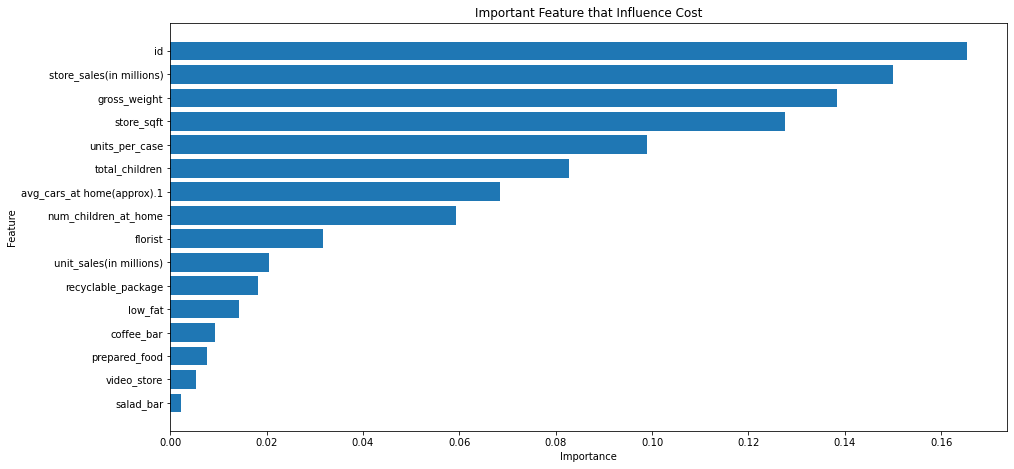

In [81]:
plot_features(test_set.columns, ideal_model.feature_importances_)

# Various features affect the cost of acquiring a customer

## Top of the list 

**1. Stores sales in millions -the higher the sales the higher the cost of acquisition**

**2. Gross weight - weight of item mean the products of great value will feature more in the outlet**

**3. Store_sqft - the bigger the store the higher the cost of acquisition**

**4. Units_per_case - more units sold only more the cost will go up**

**5. Total_children - Family set increase the cost to acquire**
 
### Bottom of the list

<em>Important to engage the subject matter expert as some factors would seem to raise the cost of acquistion, personal opinion, these factors are attraction point meaning less will be used to acquire the customer</em>

1. Salad_bar
2. Video store
3. Prepared food
4. Coffee_bar
5. Low_fat